# Introduction to Hydrofunctions
This guide will step you through the basics of using hydrofunctions. Read more in our [User's Guide](https://hydrofunctions.readthedocs.io), or visit us on [GitHub](https://github.com/mroberge/hydrofunctions)!

## Installation
The first step before using hydrofunctions is to get it installed on your system. For scientific computing, we highly recommend using the free, open-source [Anaconda](https://www.anaconda.com/download/) distribution to load and manage all of your Python tools and packages. Once you have downloaded and installed Anaconda, or if you already have Python set up on your computer, your next step is to use the pip tool from your operating system's command line to download hydrofunctions.

In Linux:
`$ pip install hydrofunctions`

In Windows:
`C:\MyPythonWorkspace\> pip install hydrofunctions`

If you have any difficulties, visit our [Installation](https://hydrofunctions.readthedocs.io/en/master/installation.html) page in the User's Guide.

## Getting Started in Python
From here on out, we will assume that you have installed hydrofunctions and you are working at a Python command prompt, 
perhaps in ipython or in a Jupyter notebook.

In [1]:
# The first step is to import hydrofunctions so that we can use it here.

import hydrofunctions as hf
# This second line allows us to automatically plot diagrams in this notebook.
%matplotlib inline

### Get data for a USGS streamflow gage
The USGS runs an amazing web service called the [National Water Information System](https://waterdata.usgs.gov/nwis). Our
first task is to download daily mean discharge data for a stream called Herring Run. Set the start date and the end date for
our download, and use the site number for Herring Run ('01585200') to specify which stream gage we want to collect data from.
You can visit the [NWIS](https://waterdata.usgs.gov/nwis) website or use [hydrocloud.org](https://mroberge.github.io/HydroCloud/) to find the site number for a stream gage near you.

In [2]:
start = '2017-06-01'
end = '2017-07-14'
herring = hf.NWIS('01585200', 'dv', start, end)
# We've set up our system, now let's submit our request for data:
herring.get_data()

## Viewing our data
There are several ways to view our data. Try herring.json() or better still, use a [Pandas](https://pandas.pydata.org/) dataframe:

In [3]:
herring.df()

,"01585200 - Mean Discharge, cubic feet per second"
datetime,
2017-06-01,0.71
2017-06-02,0.64
2017-06-03,0.61
2017-06-04,0.58
2017-06-05,1.95
2017-06-06,0.66
2017-06-07,0.62
2017-06-08,0.55
2017-06-09,0.51


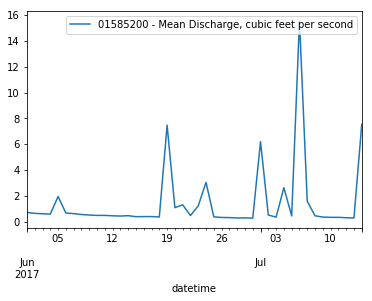

In [4]:
# Pandas' dataframes give you acess to hundreds of useful methods, such as .describe() and .plot():
herring.df().plot()

## Multiple sites, other parameters
It's possible to load data from several different sites at the same time, and you aren't limited to just stream discharge.

In [5]:
# Request data for several sites in a list
sites = ['380616075380701','394008077005601']
# The NWIS can deliver data as daily mean values ('dv') or as instantaneous values ('iv') 
# that can get collected as often as every five minutes!
service = 'iv'
# Depending on the site, the USGS collects groundwater levels ('72019'), stage ('00065'), precipitation, and more!
pcode = '72019'
# create a new dataset called 'groundwater', and we'll use the values we set up above.
groundwater = hf.NWIS(sites, service, '2018-01-01', '2018-01-31', parameterCd=pcode)
# Submit our request
groundwater.get_data().df().mean()

380616075380701 -  Depth to water level, feet below land surface    1.215141
394008077005601 -  Depth to water level, feet below land surface    3.205391
dtype: float64

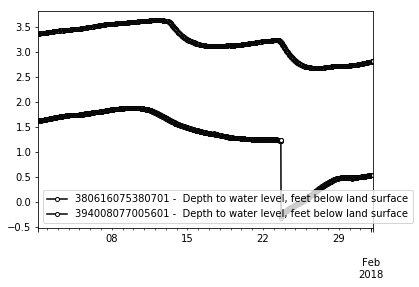

In [6]:
# Let's view the data in a specially styled graph!
groundwater.df().plot(marker='o', mfc='white', ms=4, mec='black', color='black')

## Learning More
hydrofunctions comes with a variety of built-in help functions that you can access from the command line, in addition to our online [User's Guide](https://hydrofunctions.readthedocs.io). 

Jupyter Notebooks provide additional helpful shortcuts, such as code completion. This will list all of the available
methods for an object just by hitting <TAB> like this: `herring.<TAB>` this is equivalent to using dir(herring) to list
all of the methods available to you.

In [7]:
# Typing help() or dir() for different objects allows you to access additional information.
# help(hf) is equivalent to just using a question mark like this: ?hf
help(hf.get_nwis)

Help on function get_nwis in module hydrofunctions.hydrofunctions:

get_nwis(site, service, start_date=None, end_date=None, stateCd=None, countyCd=None, parameterCd='00060', period=None)
    Request stream gauge data from the USGS NWIS.
    
    Args:
        site (str or list of strings):
            a valid site is '01585200' or ['01585200', '01646502']. site
            should be None if stateCd or countyCd are not None.
    
        service (str):
            can either be 'iv' or 'dv' for instantaneous or daily data.
                'dv'(default): daily values. Mean value for an entire day.
                'iv': instantaneous value measured at this time. Also known
                      as 'Real-time data'. Can be measured as often as every
                      five minutes by the USGS. 15 minutes is more typical.
    
        start_date (str):
           should take on the form yyyy-mm-dd
    
        end_date (str):
            should take on the form yyyy-mm-dd
    
        st

# Advanced Techniques

### Download data for a large number of sites

In [8]:
sites = ['07227500', '07228000', '07235000', '07295500', '07297910', '07298500', '07299540',
         '07299670', '07299890', '07300000', '07301300', '07301410', '07308200', '07308500', '07311600',
         '07311630', '07311700', '07311782', '07311783', '07311800', '07311900', '07312100', '07312200',
         '07312500', '07312700', '07314500', '07314900', '07315200', '07315500', '07342465', '07342480',
         '07342500', '07343000', '07343200', '07343500', '07344210', '07344500', '07346000']
mult = hf.NWIS(sites, "dv", "2018-01-01", "2018-01-31")
print('No. sites: {}'.format(len(sites)))
# This will calculate the mean value for each site, but only list the first five values.
mult.get_data().df().mean().tail()

No. sites: 38


07344500 - Minimum Discharge, cubic feet per second      6.183548
07344500 - Mean Discharge, cubic feet per second         8.130323
07346000 - Maximum Discharge, cubic feet per second    287.129032
07346000 - Minimum Discharge, cubic feet per second    283.193548
07346000 - Mean Discharge, cubic feet per second       285.000000
dtype: float64

In [9]:
mult.response.url

'https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=07227500%2C07228000%2C07235000%2C07295500%2C07297910%2C07298500%2C07299540%2C07299670%2C07299890%2C07300000%2C07301300%2C07301410%2C07308200%2C07308500%2C07311600%2C07311630%2C07311700%2C07311782%2C07311783%2C07311800%2C07311900%2C07312100%2C07312200%2C07312500%2C07312700%2C07314500%2C07314900%2C07315200%2C07315500%2C07342465%2C07342480%2C07342500%2C07343000%2C07343200%2C07343500%2C07344210%2C07344500%2C07346000&parameterCd=00060&startDT=2018-01-01&endDT=2018-01-31'

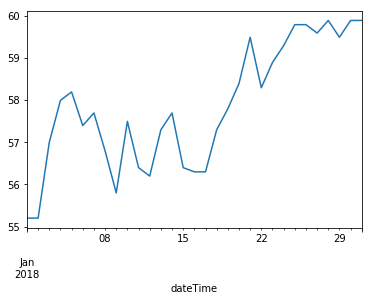

In [10]:
# Plot the data for just one site in the list
mult.get_data().df()['07228000 - Mean Discharge, cubic feet per second'].plot()

#### List some of the data available to you in a dataframe.

In [11]:
mult.df().columns

Index(['07228000 - Mean Discharge, cubic feet per second',
       '07227500 - Mean Discharge, cubic feet per second',
       '07235000 - Maximum Discharge, cubic feet per second',
       '07235000 - Minimum Discharge, cubic feet per second',
       '07235000 - Mean Discharge, cubic feet per second',
       '07295500 - Maximum Discharge, cubic feet per second',
       '07295500 - Minimum Discharge, cubic feet per second',
       '07295500 - Mean Discharge, cubic feet per second',
       '07297910 - Maximum Discharge, cubic feet per second',
       '07297910 - Minimum Discharge, cubic feet per second',
       '07297910 - Mean Discharge, cubic feet per second',
       '07298500 - Maximum Discharge, cubic feet per second',
       '07298500 - Minimum Discharge, cubic feet per second',
       '07298500 - Mean Discharge, cubic feet per second',
       '07299540 - Mean Discharge, cubic feet per second',
       '07299670 - Maximum Discharge, cubic feet per second',
       '07299670 - Minimum Di

#### Create a table of discharge data
`.head()`  only show the first five  
`.tail()`  only show the last five

In [12]:
mult.df().head()

,"07228000 - Mean Discharge, cubic feet per second","07227500 - Mean Discharge, cubic feet per second","07235000 - Maximum Discharge, cubic feet per second","07235000 - Minimum Discharge, cubic feet per second","07235000 - Mean Discharge, cubic feet per second","07295500 - Maximum Discharge, cubic feet per second","07295500 - Minimum Discharge, cubic feet per second","07295500 - Mean Discharge, cubic feet per second","07297910 - Maximum Discharge, cubic feet per second","07297910 - Minimum Discharge, cubic feet per second",...,"07343500 - Mean Discharge, cubic feet per second","07344210 - Maximum Discharge, cubic feet per second","07344210 - Minimum Discharge, cubic feet per second","07344210 - Mean Discharge, cubic feet per second","07344500 - Maximum Discharge, cubic feet per second","07344500 - Minimum Discharge, cubic feet per second","07344500 - Mean Discharge, cubic feet per second","07346000 - Maximum Discharge, cubic feet per second","07346000 - Minimum Discharge, cubic feet per second","07346000 - Mean Discharge, cubic feet per second"
dateTime,,,,,,,,,,,,,,,,,,,,,
2018-01-01,55.2,46.2,0.48,0.34,0.39,0.0,0.0,0.0,NaN,NaN,...,38.5,771.0,753.0,NaN,4.82,4.00,4.44,285.0,283.0,284.0
2018-01-02,55.2,58.8,0.54,0.31,0.41,0.0,0.0,0.0,NaN,NaN,...,34.9,1350.0,760.0,NaN,5.27,3.70,4.32,285.0,284.0,285.0
2018-01-03,57.0,56.8,0.48,0.38,0.43,0.0,0.0,0.0,NaN,NaN,...,32.6,1510.0,1350.0,NaN,6.10,4.97,5.29,285.0,284.0,284.0
2018-01-04,58.0,55.0,0.42,0.38,0.40,0.0,0.0,0.0,NaN,NaN,...,29.7,1530.0,1510.0,NaN,7.19,6.10,6.66,284.0,283.0,283.0
2018-01-05,58.2,58.8,0.42,0.38,0.40,0.0,0.0,0.0,32.5,17.2,...,26.4,1530.0,1510.0,NaN,7.42,6.61,7.03,284.0,282.0,283.0


### Download all streamflow data for the state of Virginia

In [13]:
# Use this carefully! You can easily request more data than you will know what to do with.
start = "2017-01-01"
end = "2017-12-31"
vas = hf.get_nwis(None, "dv", start, end, stateCd='va')

In [14]:
# Extract a dataframe from the response we received from the NWIS.
vad = hf.extract_nwis_df(vas)

In [15]:
# Calculate the mean for each site.
vad.mean()

01613900 - Mean Discharge, cubic feet per second      12.851436
01615000 - Mean Discharge, cubic feet per second      41.876453
01616100 - Mean Discharge, cubic feet per second       8.948493
01620500 - Mean Discharge, cubic feet per second      17.857973
01621050 - Mean Discharge, cubic feet per second       3.844548
01622000 - Mean Discharge, cubic feet per second     280.384932
01625000 - Mean Discharge, cubic feet per second     245.340548
01626000 - Mean Discharge, cubic feet per second     106.207123
01626850 - Mean Discharge, cubic feet per second     143.052603
01627500 - Mean Discharge, cubic feet per second     186.330556
01628500 - Mean Discharge, cubic feet per second     748.257534
01629500 - Mean Discharge, cubic feet per second     994.933884
01631000 - Mean Discharge, cubic feet per second    1123.279778
01632000 - Mean Discharge, cubic feet per second     124.048740
01632082 - Mean Discharge, cubic feet per second      17.520329
01632900 - Mean Discharge, cubic feet pe

#### Plot all streamflow data for the state of Virginia

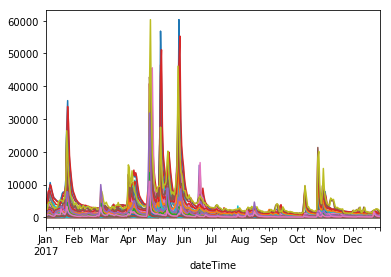

In [16]:
# There are so many sites that we can't read them all!
vad.plot(legend=None)

### Download all streamflow data for Fairfax and Prince William counties in the state of Virginia

In [17]:
start = "2017-01-01"
end = "2017-12-31"
cs = hf.get_nwis(None, "dv", start, end, countyCd=['51059', '51061'])

In [18]:
start = "2017-01-01"
end = "2017-12-31"
sites = ['51059','51061']
cs2 = hf.NWIS(None, "dv", start, countyCd=sites, end_date=end).get_data()

In [19]:
cs2.response.url

'https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&countyCd=51059%2C51061&parameterCd=00060&startDT=2017-01-01&endDT=2017-12-31'

In [20]:
start = "2017-01-01"
end = "2017-12-31"
sites = ['51059','51061']
cs2 = hf.NWIS(None, "dv", start, countyCd='51059,51061', end_date=end).get_data()

In [21]:
cs2.df().head()

,"01645704 - Mean Discharge, cubic feet per second","01645762 - Mean Discharge, cubic feet per second","01646000 - Mean Discharge, cubic feet per second","01646305 - Mean Discharge, cubic feet per second","01654000 - Mean Discharge, cubic feet per second","01654500 - Mean Discharge, cubic feet per second","01656000 - Mean Discharge, cubic feet per second","01656903 - Mean Discharge, cubic feet per second","01664000 - Mean Discharge, cubic feet per second"
dateTime,,,,,,,,,
2017-01-01,1.89,0.92,19.0,0.40,3.88,0.49,9.55,1.12,205.0
2017-01-02,4.69,1.44,28.8,2.17,18.30,2.02,9.70,2.18,200.0
2017-01-03,33.60,9.79,298.0,20.10,225.00,23.10,128.00,23.50,256.0
2017-01-04,13.40,2.87,95.6,1.26,24.10,2.17,90.50,7.46,761.0
2017-01-05,6.06,1.74,41.4,0.73,9.77,1.14,36.50,3.20,650.0


In [22]:
cdf = hf.extract_nwis_df(cs)

#### Plot all streamflow data for Fairfax and Prince William counties in the state of Virginia

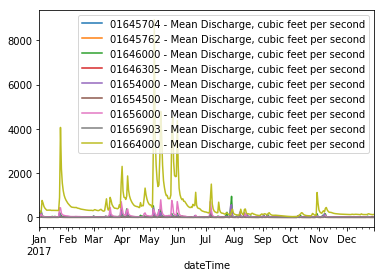

In [23]:
cdf.plot()

## Thanks for using hydrofunctions!
We would love to hear your comments and [suggestions](https://github.com/mroberge/hydrofunctions/issues)! 